# Logistic Regression with non linear boundary and Regularization

In this exercise, you will implement logistic regression and apply it to two different datasets.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - function for previous assignment](#2)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Loading and visualizing the data](#3.2)
  - [ 3.3 Feature mapping](#3.3)
  - [ 3.4 Cost function for regularized logistic regression](#3.4)
  - [ 3.5 Gradient for regularized logistic regression](#3.5)
  - [ 3.6 Learning parameters using gradient descent](#3.6)
  - [ 3.7 Plotting the decision boundary](#3.7)
  - [ 3.8 Evaluating regularized logistic regression model](#3.8)


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Functions for previous assignment (6-3)

copy to the cell above those functions:

1.   sigmoid
2.   compute_cost
3.   compute_gradient
4.   gradient_descent
5.   predict

In [ ]:
# Use sigmoid from previous assignment
# YOUR CODE HERE


In [ ]:
# Use compute_cost from previous assignment
# YOUR CODE HERE


In [ ]:
# Use compute_gradient from previous assignment
# YOUR CODE HERE


In [ ]:
# Use gradient_descent from previous assignment
# YOUR CODE HERE


In [ ]:
# Use predict from previous assignment
# YOUR CODE HERE


<a name="3"></a>
## 3 - Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

<a name="3.1"></a>
### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.
- From these two tests, you would like to determine whether the microchips should be accepted or rejected.
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

<a name="3.2"></a>
### 3.2 Loading and visualizing the data

Similar to previous parts of this exercise, let's start by loading the dataset for this task and visualizing it.

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted
      - `y_train = 0` if the microchip was rejected
  - Both `X_train` and `y_train` are numpy arrays.

In [ ]:
# load dataset
# העלאת הקובץ:
# data/ex2data2.csv
from google.colab import files
uploaded = files.upload()

Saving ex2data2.csv to ex2data2 (2).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ex2data2.csv']))
df.head(5)

,teat1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
# Extracting the features and target variable into separate numpy arrays
X_train = df.drop('accepted', axis=1).values  # Features (all columns except 'accepted')
y_train = df['accepted'].values  # Target variable ('accepted')

#### View the variables

The code below prints the first five values of `X_train` and `y_train` and the type of the variables.


In [ ]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1 1 1 1 1]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [ ]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### Visualize your data

The function `plot_data` is used to generate a figure like where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.


In [ ]:
import matplotlib.pyplot as plt

def plot_data(X_train, y_train, pos_label, neg_label,x_label,y_label):
    """
    Plot the training data on a 2D graph.

    Parameters:
    X_train : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.
    y_train : array-like, shape (n_samples,)
        Target values (class labels in classification).
    pos_label : Label for the positive class.
    neg_label : Label for the negative class.
    """
    # Separate positive and negative classes
    pos = X_train[y_train == 1]
    neg = X_train[y_train == 0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(pos[:, 0], pos[:, 1], s=50, c='b', marker='o', label=pos_label)
    plt.scatter(neg[:, 0], neg[:, 1], s=50, c='r', marker='x', label=neg_label)

    # Set the y-axis label
    plt.ylabel(y_label)
    # Set the x-axis label
    plt.xlabel(x_label)
    plt.legend(loc="upper right")
    plt.show()

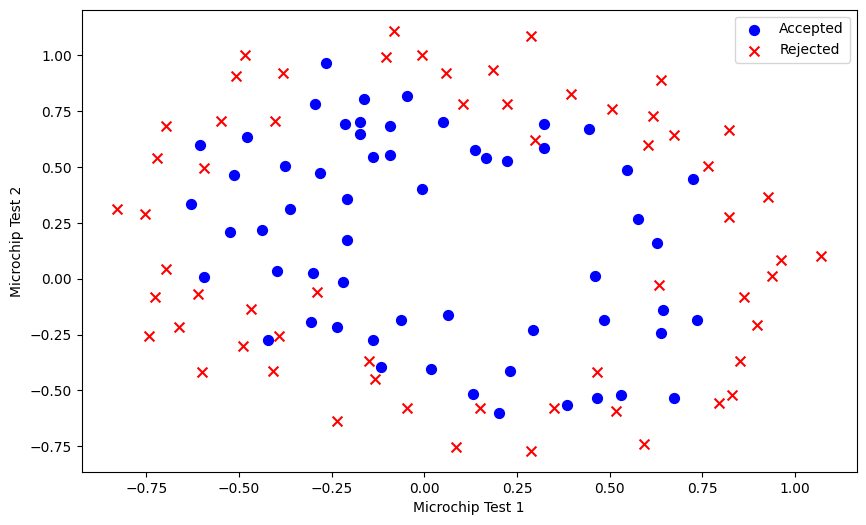

In [ ]:
# Plot examples
plot_data(X_train, y_train[:], "Accepted", "Rejected","Microchip Test 1","Microchip Test 2")


Our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

Fisrt we try to find the parametrs: w, b according to simple logistic regression with the data as is


In [ ]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = 1


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w1,b1, J_history1,_ = gradient_descent(X_train ,y_train, intial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost     0.82   
Iteration 1000: Cost     0.77   
Iteration 2000: Cost     0.74   
Iteration 3000: Cost     0.72   
Iteration 4000: Cost     0.71   
Iteration 5000: Cost     0.70   
Iteration 6000: Cost     0.70   
Iteration 7000: Cost     0.70   
Iteration 8000: Cost     0.69   
Iteration 9000: Cost     0.69   
Iteration 9999: Cost     0.69   


In [ ]:
def plot_linear_decision_boundary(X_train, y_train, w, b, f1, f2):


  # Plotting the data and decision boundary
  plt.figure(figsize=(10, 6))
  plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

  # Decision boundary (w*x + b = 0)
  x_values = [np.min(X_train[:, 0]), np.max(X_train[:, 0])]
  x_values = np.array(x_values)  # Convert list to numpy array if it's not already
  y_values = -(b + w[0] * x_values) / w[1]
  plt.plot(x_values, y_values, label="Decision Boundary", color='red')

  plt.title('Logistic Regression Classification')
  plt.xlabel(f1)
  plt.ylabel(f2)
  plt.legend()
  plt.show()

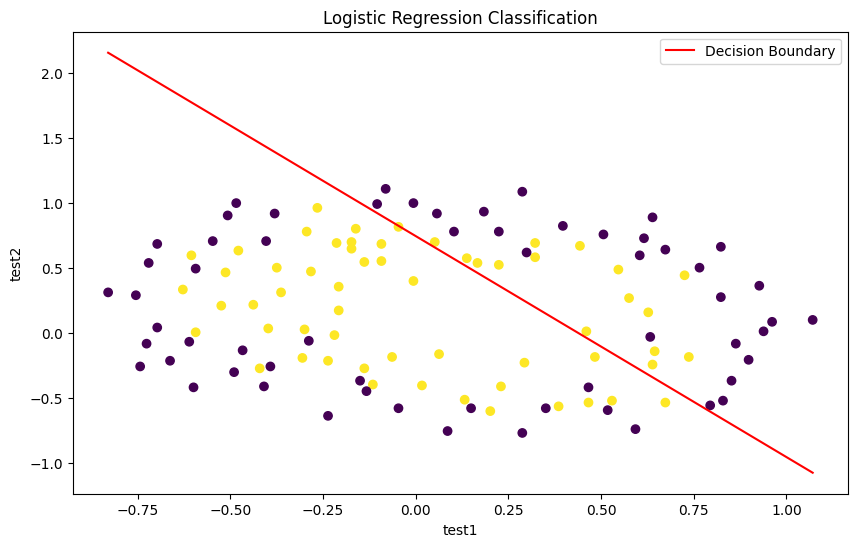

In [ ]:
#plot linear decision boundary
plot_linear_decision_boundary(X_train, y_train, w1, b1, "test1", "test2")

In [ ]:
#Compute accuracy on the original training set
p = predict(X_train, w1, b1)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 60.169492


**Expected Output**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 60%</td> </tr>
</table>

The poor accuracy can be improved with two technics:

1.   Feature mapping
2.   Regularization



<a name="2.3"></a>
### 2.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) =
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector.

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.
- We have provided the `map_feature` function for you.

In [ ]:
def map_feature(x1, x2, degree = 6):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    out = np.ones(shape=(x1[:, 0].size, 1))
    #out = ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out


In [ ]:
print("Original shape of data:", X_train.shape)

X_mapped =  map_feature(X_train[:, 0], X_train[:, 1],6)
print("Shape after feature mapping:", X_mapped.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 28)


Let's also print the first elements of `X_train` and `mapped_X` to see the tranformation.

In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", X_mapped[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

<a name="3.4"></a>
### 3.4 Cost function for regularized logistic regression

In this part, you will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$
Note that the $b$ parameter is not regularized.

<a name='ex-05'></a>
### Exercise 1

Please complete the `compute_cost_reg` function below to calculate the following term for each element in $w$
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

The starter code then adds this to the cost without regularization (which you computed above in `compute_cost`) to calculate the cost with regulatization.

In [ ]:
# Exercise 1
def compute_cost_reg(X, y, w, b,lambda_):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape

    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    # You need to calculate reg_cost
    reg_cost = 0.

    ### START CODE HERE ###


    ### END CODE HERE ###

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

Run the cell below to check your implementation of the `compute_cost_reg` function.

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.01
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b,lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6809878426182082


**Expected Output**:
<table>
  <tr>
    <td> <b>Regularized cost : <b></td>
    <td> 0.6809878426182082 </td>
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradient for regularized logistic regression

In this section, you will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$





<a name='ex-06'></a>
### Exercise 2

Please complete the `compute_gradient_reg` function below to modify the code below to calculate the following term

$$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

The starter code will add this term to the $\frac{\partial J(\mathbf{w},b)}{\partial w}$ returned from `compute_gradient` above to get the gradient for the regularized cost function.

In [ ]:
# Exercise 2
def compute_gradient_reg(X, y, w, b, lambda_ = 0.01):
    """
    Computes the gradient for linear regression

    Args:
      X : (ndarray Shape (m,n))   variable such as house size
      y : (ndarray Shape (m,))    actual value
      w : (ndarray Shape (n,))    values of parameters of the model
      b : (scalar)                value of parameter of the model
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b.
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.

    """
    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###
    ### replace "???" with your code
    for j in range(n):

          dj_dw_j_reg = ???

          # Add the regularization term  to the correspoding element of dj_dw
          dj_dw[j] = ??? + ???

    ### END CODE HERE ###

    return dj_db, dj_dw

Run the cell below to check your implementation of the `compute_gradient_reg` function.

In [ ]:
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.01

dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b,lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.028230434804479343
First few elements of regularized dj_dw:
 [0.02822340277097956, 0.029525664478677934, -0.05038936604129027, 0.06277855697878962]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.028230434804479343</td> </tr>
  <tr>
      <td> <b> First few elements of regularized dj_dw:</b> </td> </tr>
   <tr>
   <td> [0.02822340277097956, 0.029525664478677934, -0.05038936604129027, 0.06277855697878962] </td>
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Learning parameters using gradient descent

Similar to the previous parts, you will use your gradient descent function implemented above to learn the optimal parameters $w$,$b$.
- If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters $w$.
- After training our parameters, we will use it to plot the decision boundary.

**Note**

The code block below takes quite a while to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time, run for 100,000 iterations to see better results.

In [ ]:
def gradient_descent_reg(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_reg(X, y, w_in, b_in,lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  compute_cost_reg(X, y, w_in, b_in,lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 0.01 (you can try varying this)
lambda_ = 0.01
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent_reg(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.60   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.44   


<details>
<summary>
    <b>Expected Output: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

<a name="2.7"></a>
### 2.7 Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our `plot_decision_boundary` function which plots the (non-linear) decision boundary that separates the positive and negative examples.

- In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.

- After learning the parameters $w$,$b$, the next step is to plot a decision boundary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(w, b, X_mapped, y_train):
    """
    Plots the decision boundary for a logistic regression model with non-linear features.

    Parameters:
    w: array-like, shape (n_features,)
        Coefficients of the logistic regression model.
    b: scalar
        Bias term of the logistic regression model.
    X_mapped: array-like, shape (n_samples, n_features)
        Feature-mapped input data.
    y_train: array-like, shape (n_samples,)
        True labels.
    """
    # Define the grid range
    x_min, x_max = X_mapped[:, 1].min() - 1, X_mapped[:, 1].max() + 1
    y_min, y_max = X_mapped[:, 2].min() - 1, X_mapped[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    # Map the features of the grid points
    Z_mapped = map_feature(xx.ravel(), yy.ravel())

    # Compute the predictions for each point in the grid
    Z = sigmoid(np.dot(Z_mapped, w) + b)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_mapped[:, 1], X_mapped[:, 2], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

    plt.show()


# Usage example (assuming `w`, `b`, `X_mapped`, and `y_train` are already defined):
# plot_decision_boundary(w, b, X_mapped, y_train)


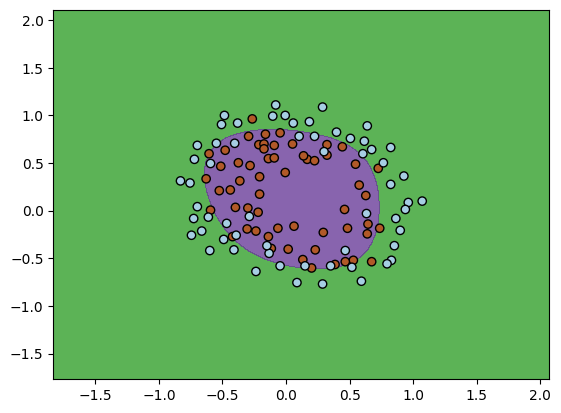

In [ ]:
#With Regularization
plot_decision_boundary(w, b, X_mapped, y_train)

<a name="2.8"></a>
### 2.8 Evaluating regularized logistic regression model

You will use the `predict` function that you implemented above to calculate the accuracy of the regulaized logistic regression model on the training set

In [ ]:
#Compute accuracy on the training set
#With Regularization
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 83.898305


**Expected Output**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 80%</td> </tr>
</table>

Credit to: Coursera-Supervised Machine Learning: Regression and Classification

Modified by: Merav Varsano Maala